In [1]:
%config InlineBackend.figure_format = 'retina'

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

<div class="alert alert-danger">
  You must have Prophet package: <br>
   ! pip install prophet <br>
</div>

# 1) Loading data

In [4]:
one_day_data = pd.read_csv("./data/binned_one_day.csv")
whole_data = pd.read_csv("./data/binned_whole_data_set.csv")

In [5]:
one_day_data.head()

,15min_bin,glucose
0,0,6.00
1,15,6.05
2,30,6.15
3,45,6.10
4,60,5.90


In [6]:
whole_data.head()

,15min_bin,glucose
0,2019-07-31 10:45:00,6.80
1,2019-07-31 11:00:00,6.80
2,2019-07-31 11:15:00,6.40
3,2019-07-31 11:30:00,6.15
4,2019-07-31 11:45:00,5.90


# 2) Let's focus on the one-day data set

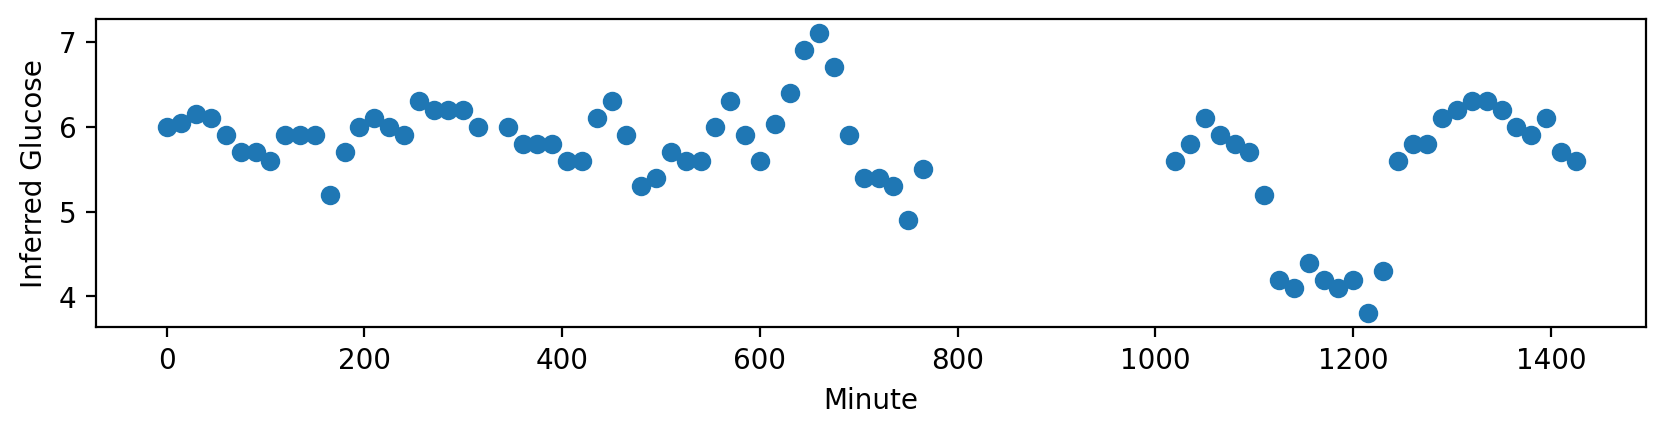

In [7]:
plt.figure(figsize=(10, 2))
plt.plot(one_day_data["15min_bin"], one_day_data.glucose, lw=0, marker="o")
plt.xlabel("Minute")
plt.ylabel("Inferred Glucose");

In [8]:
missing_minutes = one_day_data[one_day_data.isna()["glucose"]]["15min_bin"].values

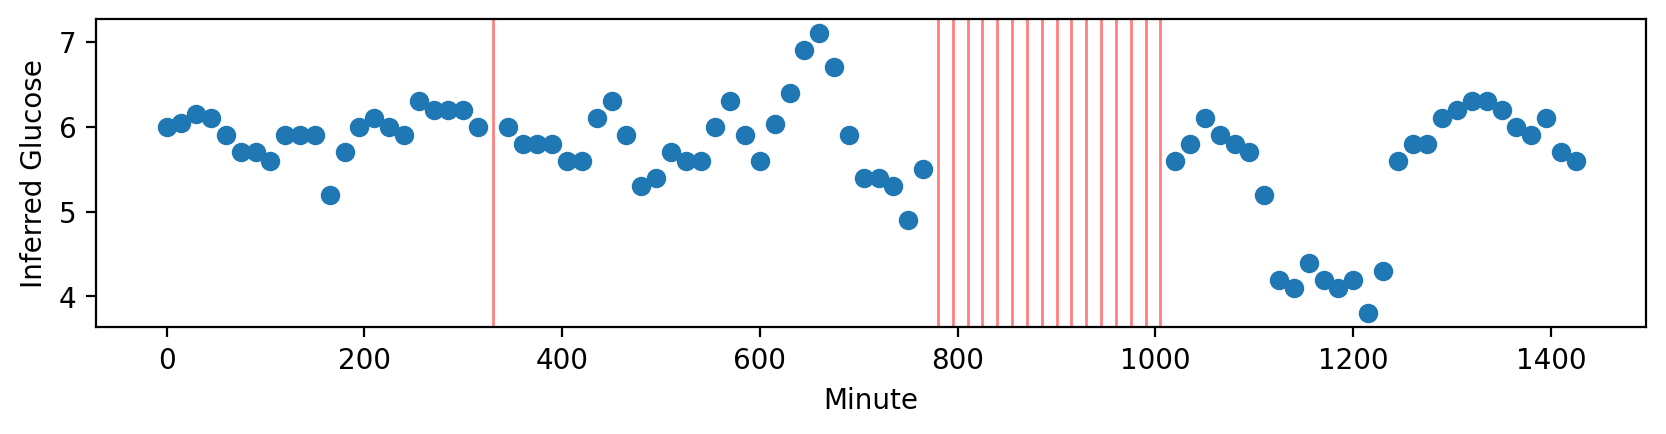

In [9]:
plt.figure(figsize=(10, 2))
plt.plot(one_day_data["15min_bin"], one_day_data.glucose, lw=0, marker="o")
for d in missing_minutes:
    plt.axvline(d, lw=1, color='red', alpha=0.5)
plt.xlabel("Minute")
plt.ylabel("Inferred Glucose");

In [10]:
data = one_day_data

# 3) Imputing missing values

### Simple Imputation
1. Forward Fill (ffill)  
2. Backward Fill (bfill)  
3. Central Tendency: Mean Imputation

### Rolling Window Imputation
4. Moving Average Imputation  

### Machine Learning-based
5. k-Nearest Neighbors (KNN) Imputation  

### Interpolation-based Methods
6. Nearest Interpolation  
7. Linear Interpolation  
8. Quadratic Interpolation  
9. Polynomial Interpolation  
10. Spline Interpolation  

### Time Series Decomposition
11. Trend & Seasonal Decomposition (STL)  

### Forecast-based Imputation
12. Prophet Forecasting Imputation  


## 3.1) Forward-Filling Method

In [11]:
data.head()

,15min_bin,glucose
0,0,6.00
1,15,6.05
2,30,6.15
3,45,6.10
4,60,5.90


In [12]:
data_filled_forward = data.fillna(method="ffill")

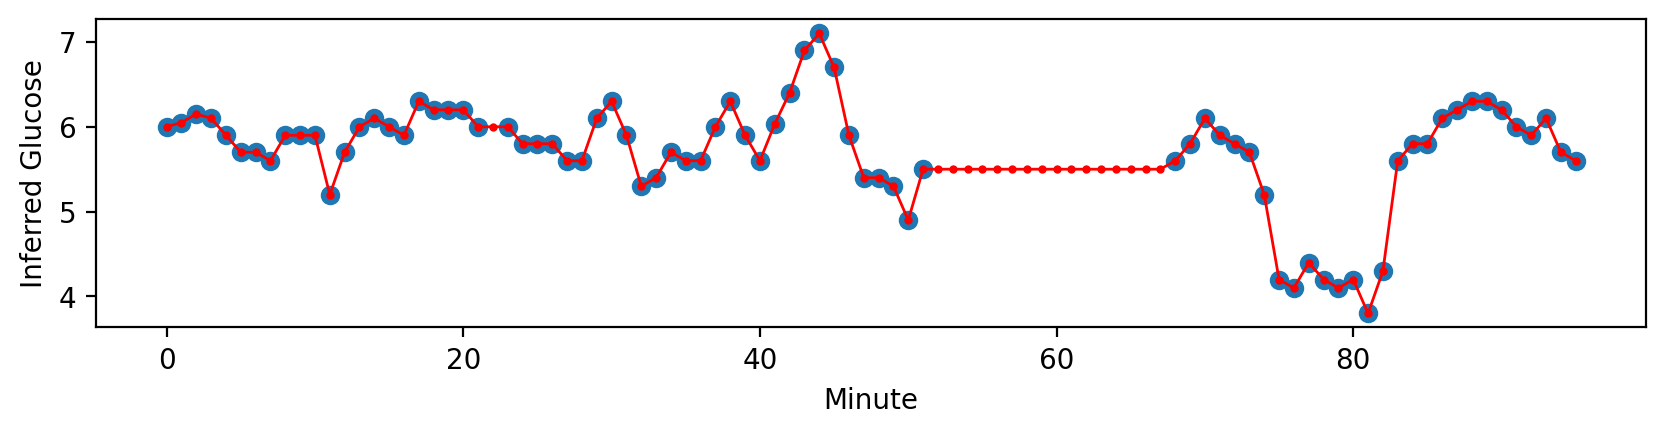

In [13]:
plt.figure(figsize=(10, 2))
plt.plot(data["glucose"], lw=1, marker="o", ls="")
plt.plot(data_filled_forward.index, data_filled_forward["glucose"], lw=1, ms=4, marker=".", color="red")
plt.xlabel("Minute")
plt.ylabel("Inferred Glucose");

## 3.2) Backward-Filling Method

In [14]:
data_filled_backward = data.fillna(method="bfill")

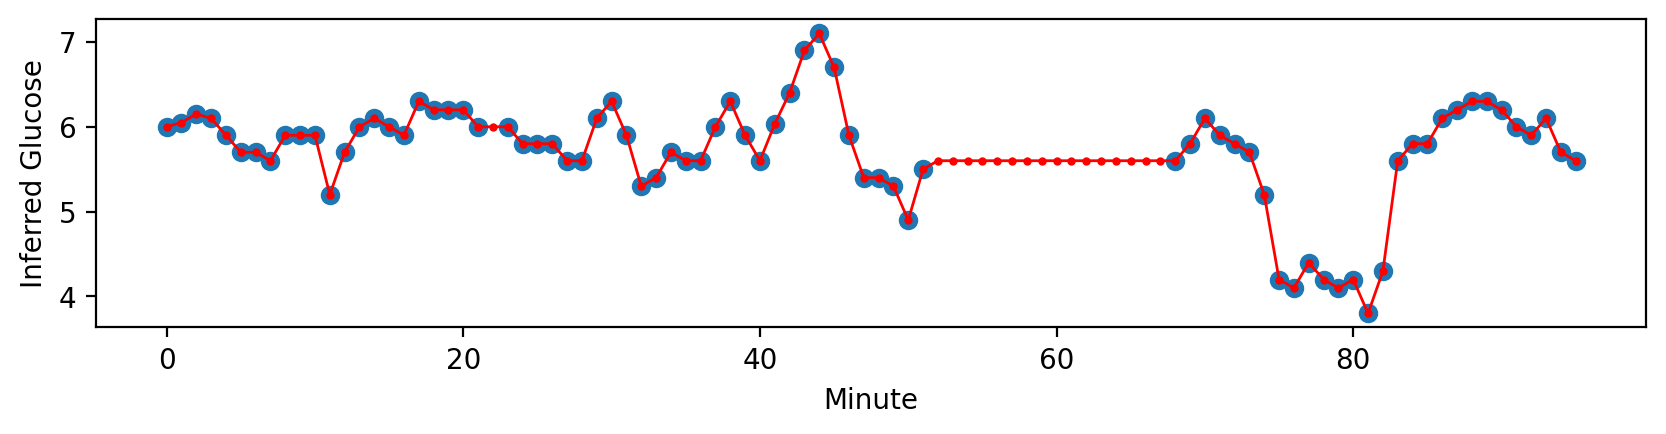

In [15]:
plt.figure(figsize=(10, 2))
plt.plot(data["glucose"], lw=1, marker="o", ls="")
plt.plot(data_filled_backward.index, data_filled_backward["glucose"],lw=1, ms=4, marker=".", color="red")
plt.xlabel("Minute")
plt.ylabel("Inferred Glucose");

## 3.3) Central tendency 

In [16]:
mean_val = data["glucose"].mean()
data_mean_imputed = data["glucose"].fillna(mean_val)

Text(0, 0.5, 'Inferred Glucose')

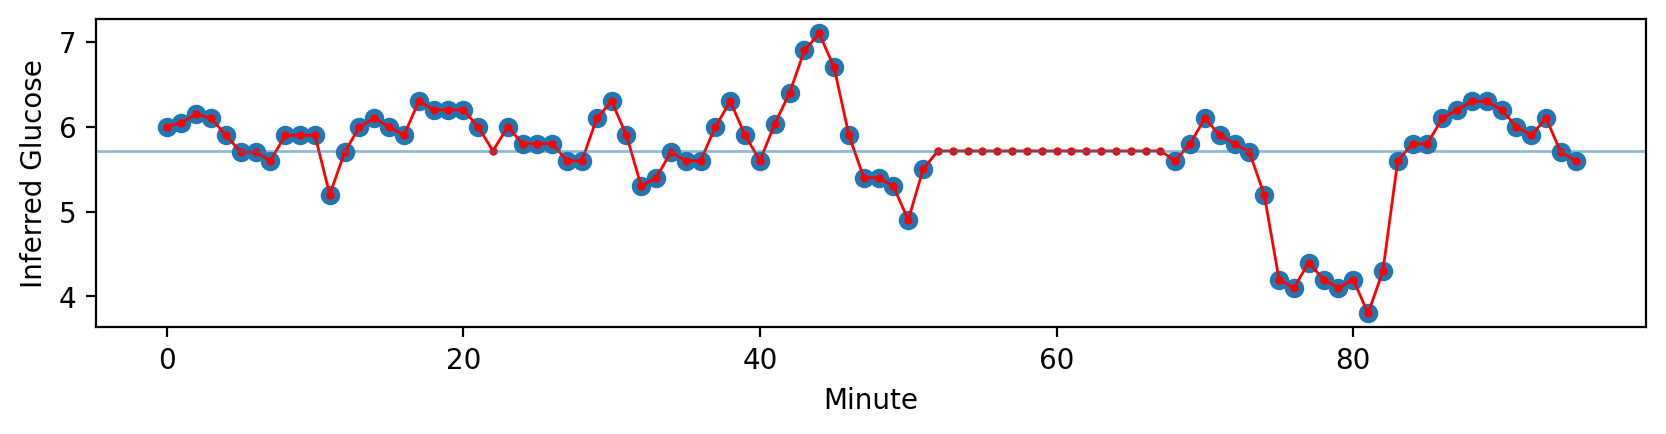

In [17]:
plt.figure(figsize=(10, 2))
plt.plot(data["glucose"], lw=1, marker="o", ls="")
plt.plot(data.index, data_mean_imputed,lw=1, ms=4, marker=".", color="red")
plt.axhline(mean_val, lw=1, alpha=0.5)
plt.xlabel("Minute")
plt.ylabel("Inferred Glucose")

## 3.4) Moving average

In [18]:
window_size = 24 # <-- 
data_ma_interpolated = data["glucose"].copy()
data_ma_interpolated = data_ma_interpolated.fillna(
    data_ma_interpolated.rolling(window=window_size, min_periods=1, center=True).mean())

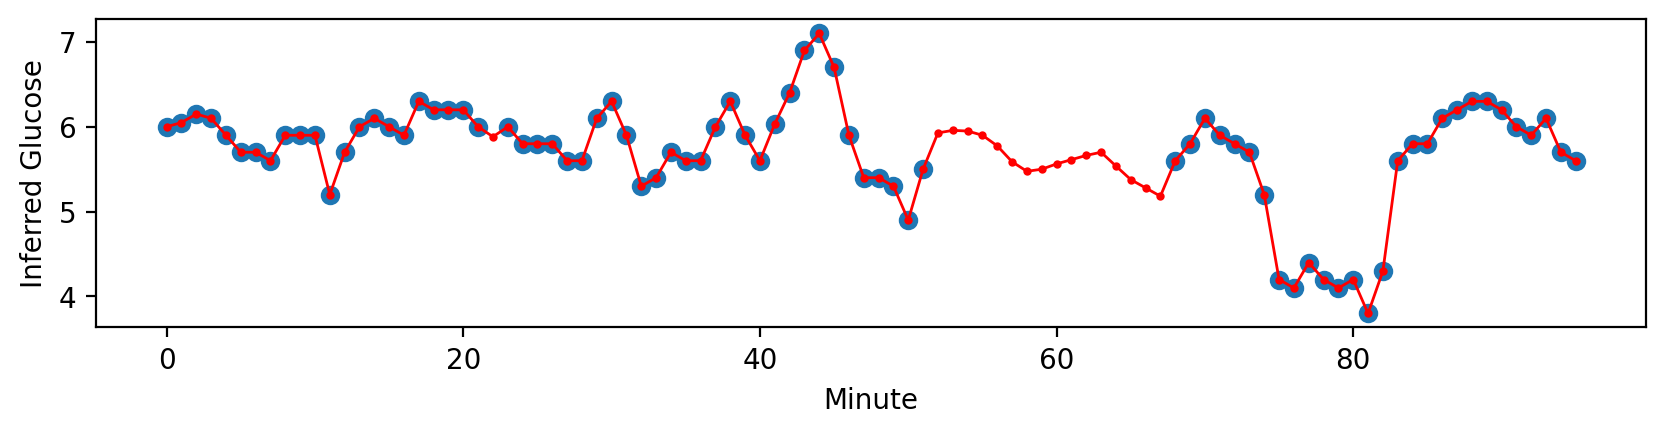

In [19]:
plt.figure(figsize=(10, 2))
plt.plot(data["glucose"], lw=1, marker="o", ls="")
plt.plot(data.index, data_ma_interpolated, lw=1, ms=4, marker=".", color="red")
plt.xlabel("Minute")
plt.ylabel("Inferred Glucose");

## 3.5) k-Nearest Neighbors

In [20]:
from sklearn.impute import KNNImputer

In [21]:
imputer = KNNImputer(n_neighbors=10)
data_knn_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns, index=data.index)

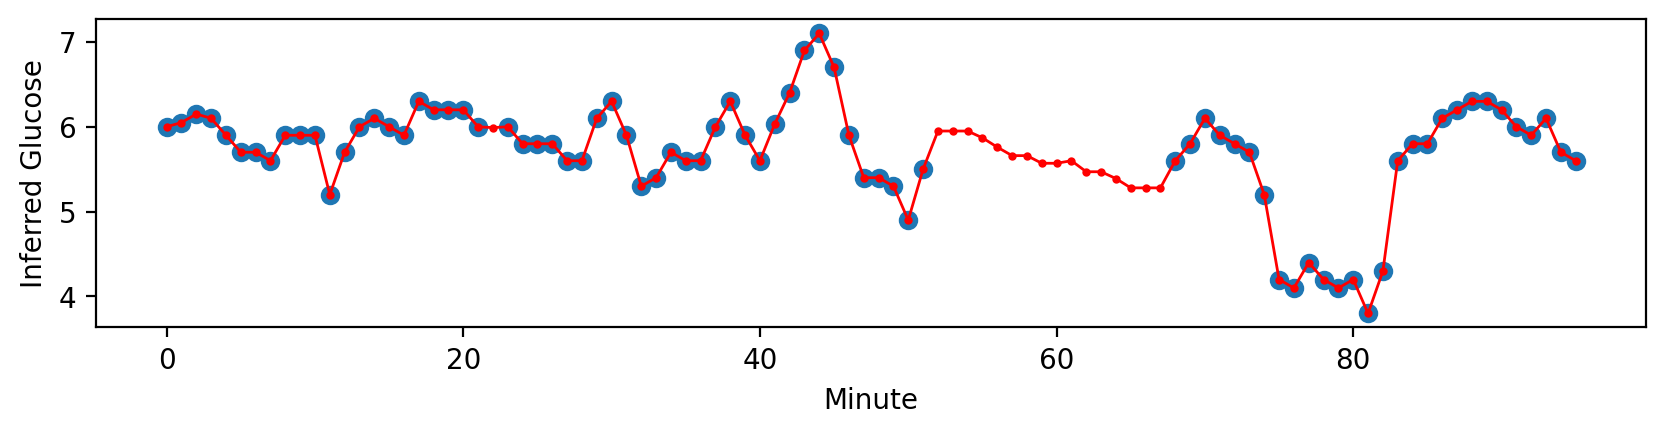

In [22]:
plt.figure(figsize=(10, 2))
plt.plot(data["glucose"], lw=1, marker="o", ls="")
plt.plot(data_knn_imputed.index, data_knn_imputed["glucose"], lw=1, ms=4, marker=".", color="red")
plt.xlabel("Minute")
plt.ylabel("Inferred Glucose");

## 3.6) Interpolation

### 3.3.1) Nearest interpolation

In [23]:
data_nearest_interpolated = data.interpolate(method="nearest")

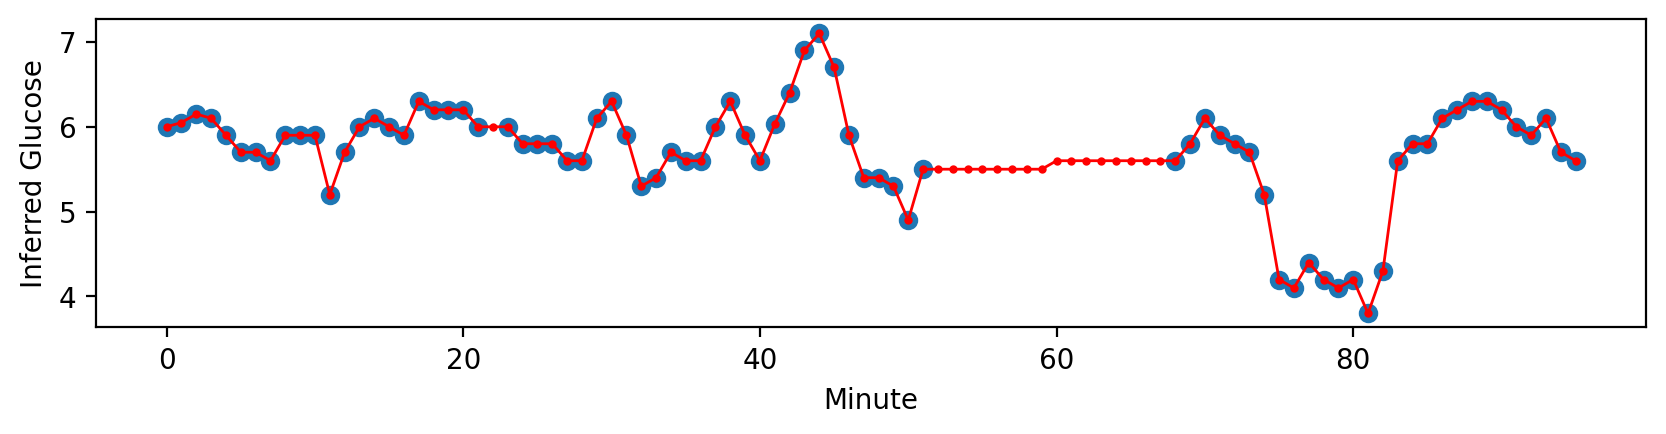

In [24]:
plt.figure(figsize=(10, 2))
plt.plot(data["glucose"], lw=1, marker="o", ls="")
plt.plot(data_nearest_interpolated.index, data_nearest_interpolated["glucose"], lw=1, ms=4, marker=".", color="red")
plt.xlabel("Minute")
plt.ylabel("Inferred Glucose");

### 3.3.2) Linear interpolation

In [25]:
data_interpolated = data.interpolate(method="linear")

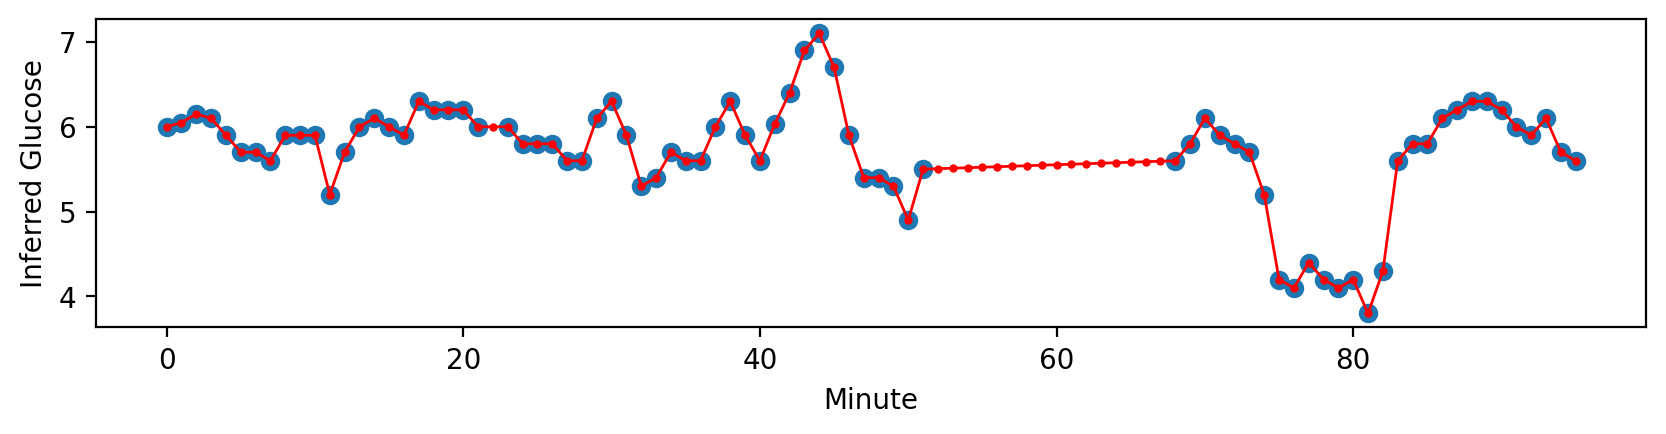

In [26]:
plt.figure(figsize=(10, 2))
plt.plot(data["glucose"], lw=1, marker="o", ls="")
plt.plot(data_interpolated.index, data_interpolated["glucose"], lw=1, ms=4, marker=".", color="red")
plt.xlabel("Minute")
plt.ylabel("Inferred Glucose");

### 3.3.3) Quadratic interpolation

In [27]:
data_quadratic_interpolated = data.interpolate(method="quadratic")

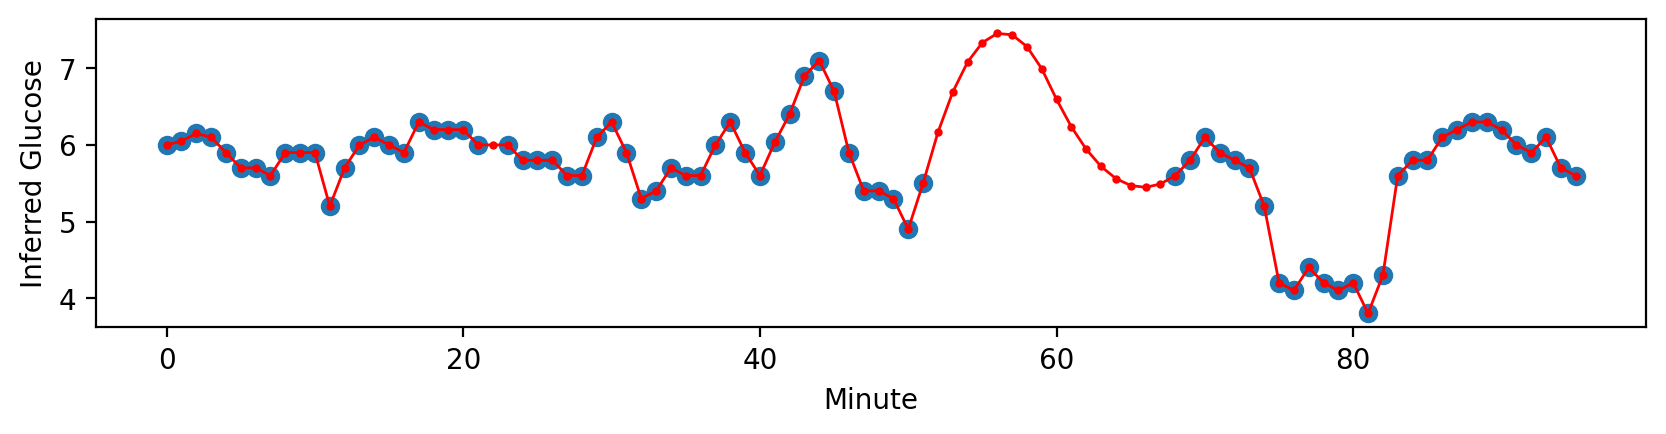

In [28]:
plt.figure(figsize=(10, 2))
plt.plot(data["glucose"], lw=1, marker="o", ls="")
plt.plot(data_quadratic_interpolated.index, data_quadratic_interpolated["glucose"], lw=1, ms=4, marker=".", color="red")
plt.xlabel("Minute")
plt.ylabel("Inferred Glucose");

### 3.3.4) Polynomial interpolation

In [29]:
data_polynomial_interpolated = data.interpolate(method="polynomial", order=3)

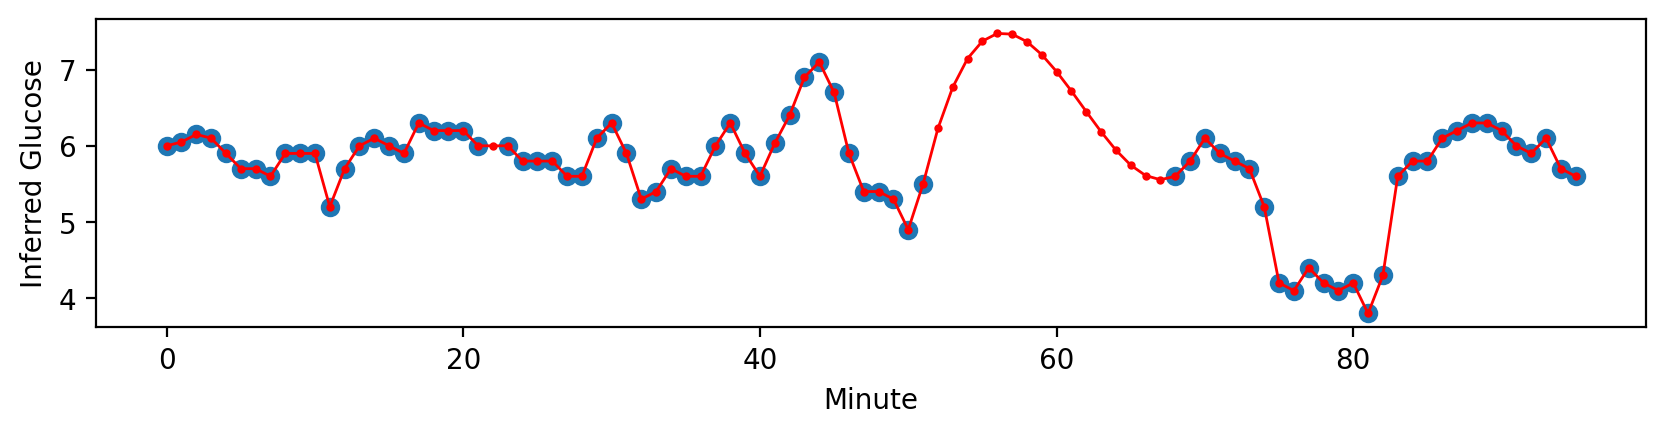

In [30]:
plt.figure(figsize=(10, 2))
plt.plot(data["glucose"], lw=1, marker="o", ls="")
plt.plot(data_polynomial_interpolated.index, data_polynomial_interpolated["glucose"], lw=1, ms=4, marker=".", color="red")
plt.xlabel("Minute")
plt.ylabel("Inferred Glucose");

### 3.3.5) Spline interpolation

In [31]:
data_spline_interpolated = data.interpolate(method="spline", order=2)

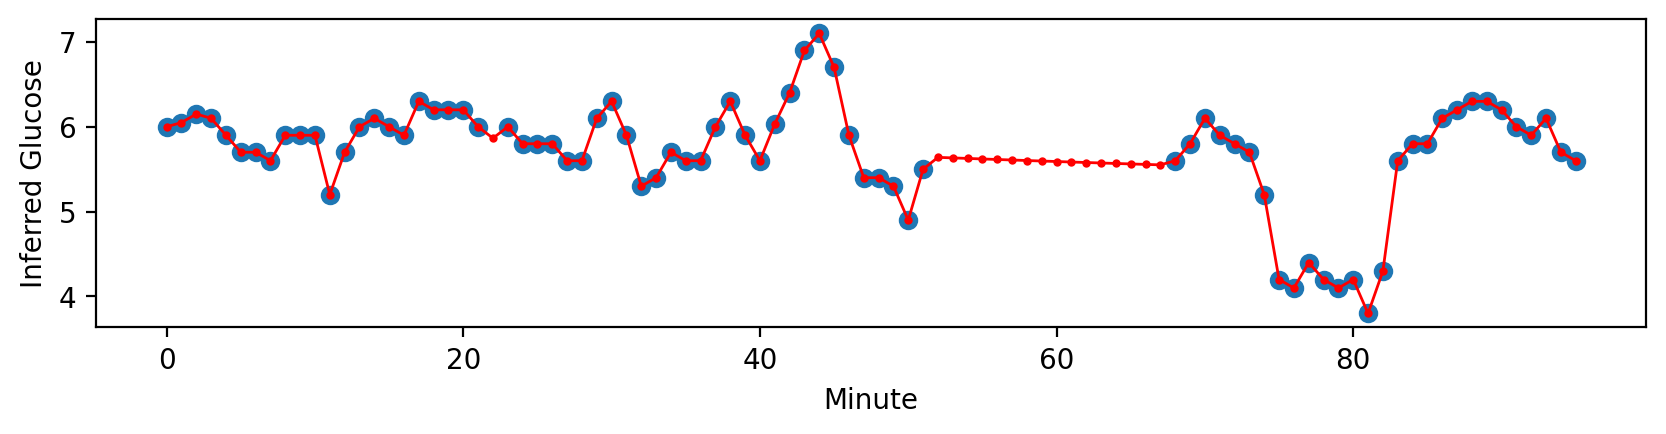

In [32]:
plt.figure(figsize=(10, 2))
plt.plot(data["glucose"], lw=1, marker="o", ls="")
plt.plot(data_spline_interpolated.index, data_spline_interpolated["glucose"], lw=1, ms=4, marker=".", color="red")
plt.xlabel("Minute")
plt.ylabel("Inferred Glucose");

In [33]:
data_nearest_interpolated = data.interpolate(method="nearest")

## 3.4) Trend and Seasonal Decomposition

### Our goal here is to impute missing values without breaking the seasonal structure of the time series. ✨

For this one, let's use the whole data, as we can learn about trend and seasonal components. 

In [34]:
whole_data['15min_bin'] = pd.to_datetime(whole_data['15min_bin'])
whole_data_copy = whole_data.copy()
whole_data.head()

,15min_bin,glucose
0,2019-07-31 10:45:00,6.80
1,2019-07-31 11:00:00,6.80
2,2019-07-31 11:15:00,6.40
3,2019-07-31 11:30:00,6.15
4,2019-07-31 11:45:00,5.90


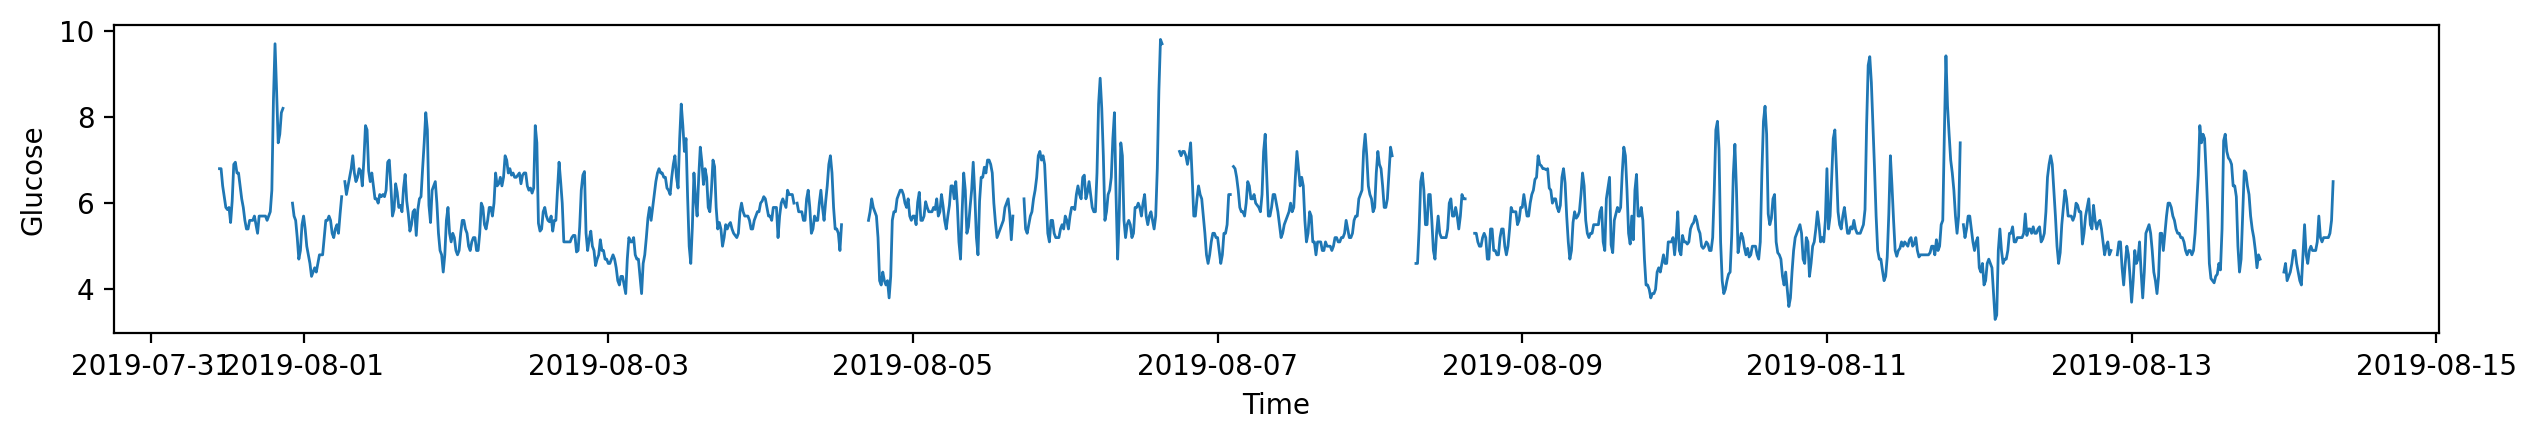

In [35]:
plt.figure(figsize=(15, 2))
plt.plot(whole_data_copy['15min_bin'], whole_data_copy['glucose'], linestyle='-', lw=1)
plt.xlabel("Time")
plt.ylabel("Glucose");

In [36]:
imputed_indices = whole_data_copy[whole_data_copy['glucose'].isnull()].index

In order for us to decompose our time series, let's do an initial interpolation:

In [37]:
interpolated = whole_data_copy['glucose'].interpolate(method='linear')

In [38]:
from statsmodels.tsa.seasonal import STL

The period tells the model how many observations make up one full seasonal cycle in your data.

In [39]:
decomposition = STL(interpolated, period=24*4) # each 24 hours has 24*4 15 minutes. 
decomposition_result = decomposition.fit()

We wil use STL (Seasonal-Trend decomposition using Loess). 

STL breaks a time series into:
* Trend (long-term movement)
* Seasonal (repeating cycles)
* Residual (what’s left)

This will give us the repeating pattern (e.g., if glucose levels cycle every day, this captures that daily cycle) in the series.

In [40]:
# decomposition_result.plot()

<b>The goal here is to interpolate only the "non-seasonal" part of our time series.</b> 🫡

For that, we first remove the seasonality of our data: 

In [41]:
seasonal = decomposition_result.seasonal
deseasonalized = whole_data_copy['glucose'] - seasonal

Then, we interpolate what it is left in the series:

In [42]:
deseasonalized_imputed = deseasonalized.interpolate(method='linear')

Finally, we put the seasonality back to the time series: 

In [43]:
final_imputed = deseasonalized_imputed + seasonal

### Great success 🥸! 

Next, we only impute where we have `NaN`:

In [44]:
whole_data_copy.loc[imputed_indices, 'glucose'] = final_imputed.loc[imputed_indices]

And here we have it: 

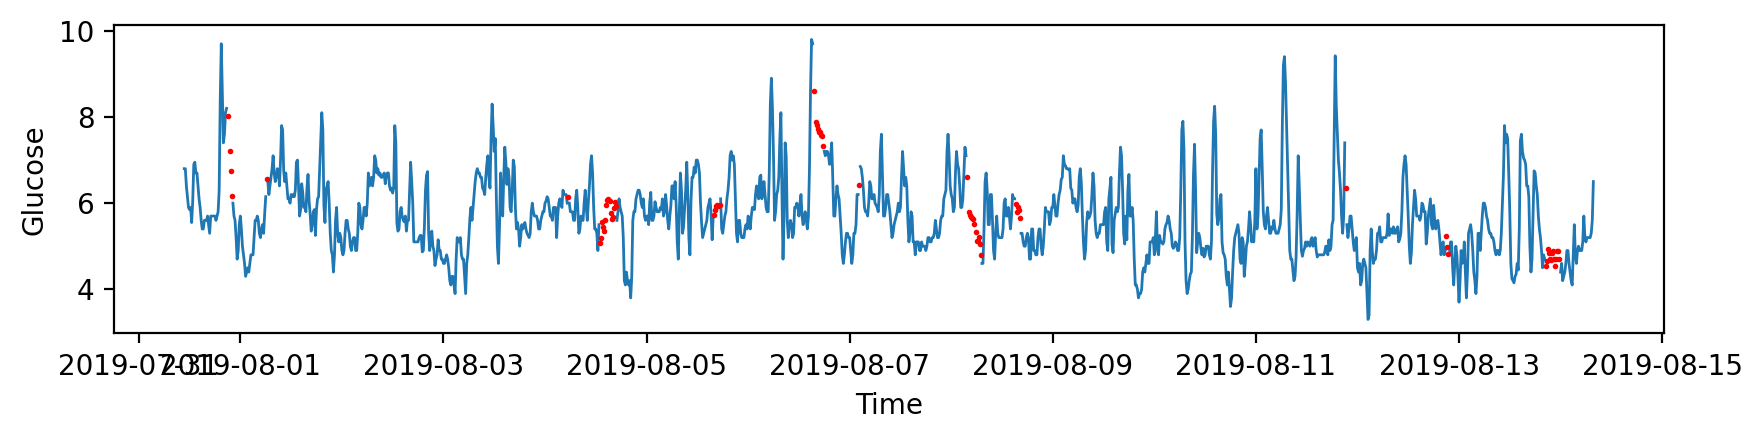

In [45]:
plt.figure(figsize=(10, 2))
plt.plot(whole_data['15min_bin'], whole_data['glucose'], linestyle='-', lw=1)

# only the imputed
plt.plot(whole_data_copy.loc[imputed_indices, '15min_bin'], 
         whole_data_copy.loc[imputed_indices, 'glucose'], ms=1, lw=0, marker="o", color='red')
plt.xlabel("Time")
plt.ylabel("Glucose");

<div class="alert alert-info">
  <strong>Assignment 1:</strong> How well did it perform? Create synthetic missing values in the data and compare the imputed values to the original.
</div>

<div class="alert alert-info">
 <strong>Assignment 2:</strong> We used linear method to interpolate. How about other methods? Use different methods to interpolate and compare their performance, using synthetic missing values. 
</div>

### Oh wait, let's now check how that particular day looks like 🤓

In [46]:
check_that_one_day = whole_data_copy[(whole_data_copy['15min_bin']>='2019-08-04')&(whole_data_copy['15min_bin']<'2019-08-05')].copy()

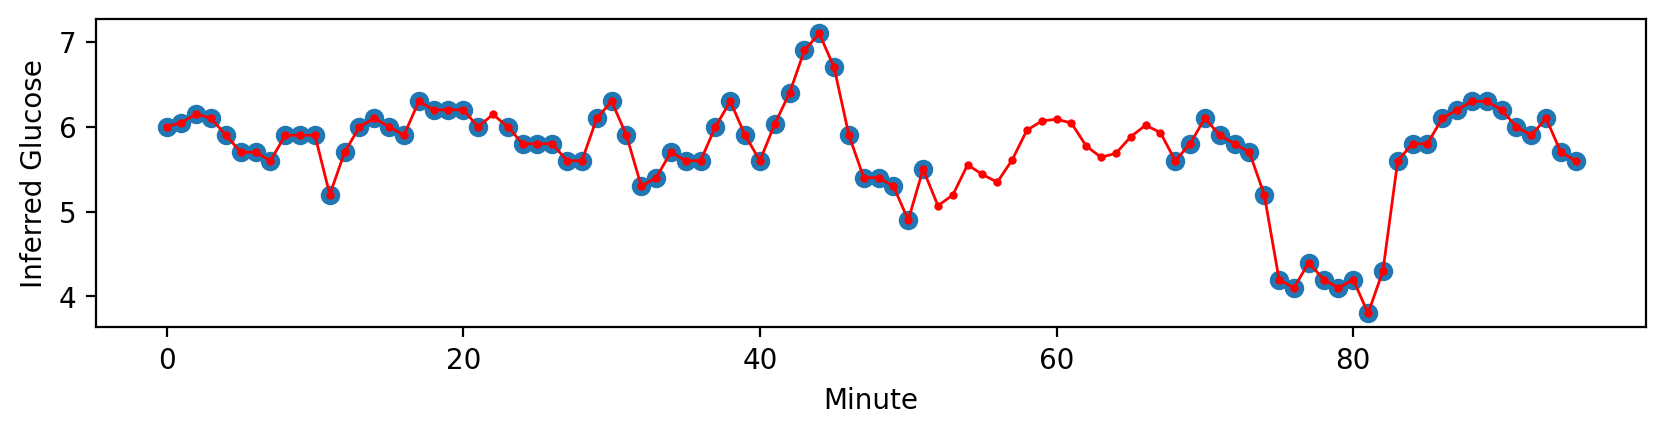

In [47]:
plt.figure(figsize=(10, 2))
plt.plot(data["glucose"], lw=1, marker="o", ls="")
plt.plot(data_interpolated.index, check_that_one_day["glucose"], lw=1, ms=4, marker=".", color="red")
plt.xlabel("Minute")
plt.ylabel("Inferred Glucose");

<div class="alert alert-info">
 <strong>Assignment 4:</strong> How does Trend and Seasonal Decomposition method compare with the other methods? 
</div>

## 3.5) Prophet 🔮🧙‍♂️🧙🏻‍♀️

In [48]:
from prophet import Prophet

In [49]:
df_prophet = whole_data[['15min_bin', 'glucose']].copy()
df_prophet = df_prophet.rename(columns={'15min_bin': 'ds', 'glucose': 'y'})

In [50]:
df_prophet.head()

,ds,y
0,2019-07-31 10:45:00,6.80
1,2019-07-31 11:00:00,6.80
2,2019-07-31 11:15:00,6.40
3,2019-07-31 11:30:00,6.15
4,2019-07-31 11:45:00,5.90


We use observed values for training.

In [51]:
train_df = df_prophet[df_prophet['y'].notna()]

In [52]:
model = Prophet(
    interval_width=0.9, 
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.9,  # default: 0.05; higher if trend series changes fast
    n_changepoints=1000, # default: 25; number of potential locations the model looks for trend changes.
    daily_seasonality=True, 
    weekly_seasonality=False)

In [53]:
model.fit(train_df)

20:17:01 - cmdstanpy - INFO - Chain [1] start processing
20:17:06 - cmdstanpy - INFO - Chain [1] done processing


In [54]:
full_dates = pd.DataFrame({'ds': df_prophet['ds']})

In [55]:
forecast = model.predict(full_dates)
df_prophet['yhat'] = forecast['yhat']

Impute only missing values:

In [56]:
df_prophet['y_imputed'] = df_prophet['y']
df_prophet.loc[df_prophet['y'].isna(), 'y_imputed'] = df_prophet.loc[df_prophet['y'].isna(), 'yhat']

In [57]:
df_prophet.head()

,ds,y,yhat,y_imputed
0,2019-07-31 10:45:00,6.80,6.249994,6.80
1,2019-07-31 11:00:00,6.80,6.247051,6.80
2,2019-07-31 11:15:00,6.40,6.248114,6.40
3,2019-07-31 11:30:00,6.15,6.252758,6.15
4,2019-07-31 11:45:00,5.90,6.260312,5.90


In [58]:
check_that_one_day_prophet = df_prophet[(df_prophet['ds']>='2019-08-04')&(df_prophet['ds']<'2019-08-05')].copy()

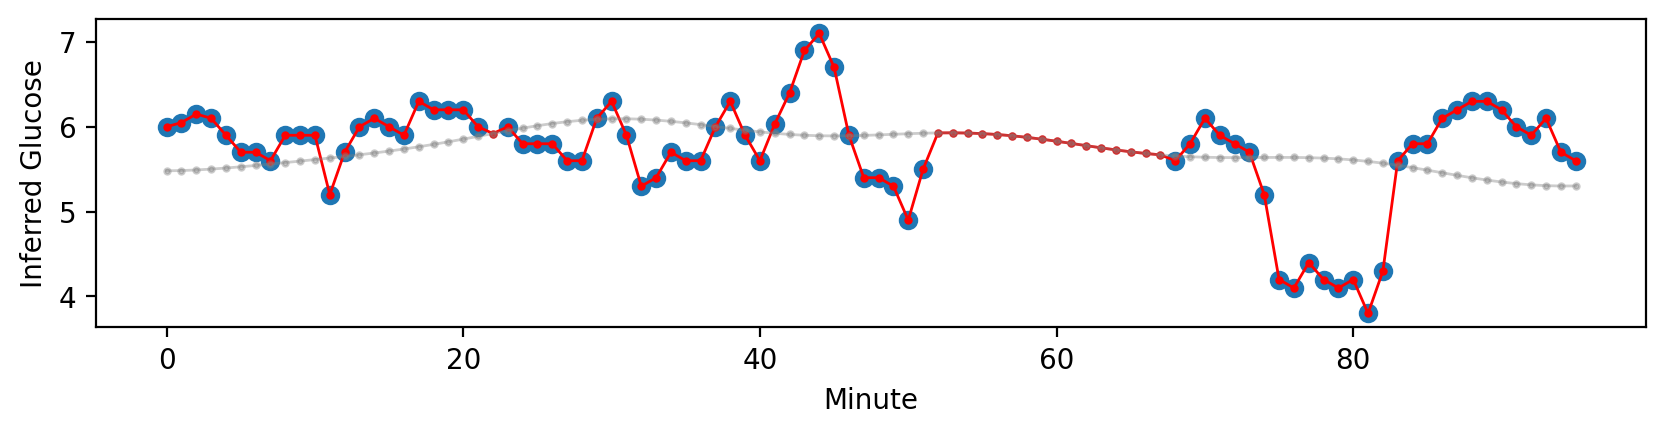

In [59]:
plt.figure(figsize=(10, 2))
plt.plot(data["glucose"], lw=1, marker="o", ls="")
plt.plot(data["glucose"].index, check_that_one_day_prophet["y_imputed"], lw=1, ms=4, marker=".", color="red")
plt.plot(data["glucose"].index, check_that_one_day_prophet["yhat"], lw=1, ms=4, marker=".", color="gray", alpha=0.4)
plt.xlabel("Minute")
plt.ylabel("Inferred Glucose");

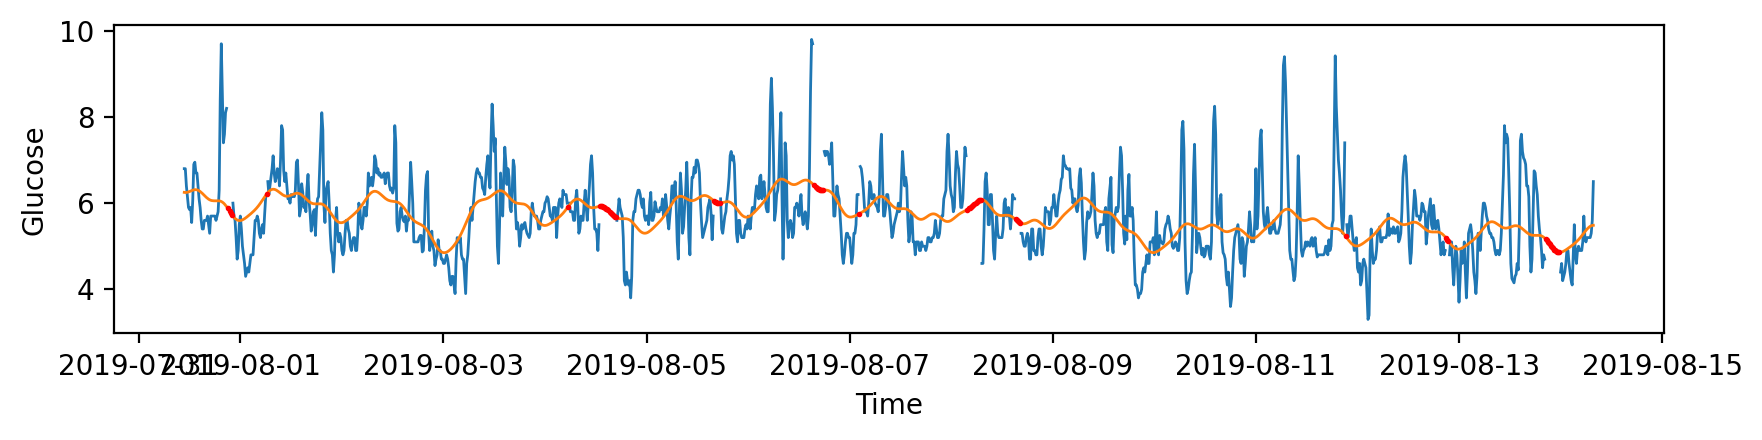

In [60]:
plt.figure(figsize=(10, 2))
plt.plot(whole_data['15min_bin'], whole_data['glucose'], linestyle='-', lw=1)
plt.plot(whole_data['15min_bin'], df_prophet['yhat'], linestyle='-', lw=1)


# only the imputed
plt.plot(whole_data_copy.loc[imputed_indices, '15min_bin'], 
         df_prophet.loc[imputed_indices, 'yhat'], ms=1, lw=0, marker="o", color='red')
plt.xlabel("Time")
plt.ylabel("Glucose");

### Let's see some synthetic data

In [61]:
import numpy as np

In [62]:
periods = 96 * 20  # 20 days, 96 points/day (15-min intervals)
time = pd.date_range(start='2025-01-01', periods=periods, freq='15min')
t = np.arange(periods)

amplitude = 1 + 0.5 * np.sin(2 * np.pi * t / (96 * 5))  # changes every 5 days

circadian = amplitude * np.sin(2 * np.pi * (t % 96) / 96)
trend = 0.002 * t
noise = np.random.normal(0, 0.1, periods)  # <-- 

y = 6 + circadian + trend + noise
df = pd.DataFrame({'ds': time, 'y': y, 'y_full': y})

We remove chunks of data: 

In [63]:
missing_chunks = [(1000, 1100), (400, 500), (1200, 1300)]
for start, end in missing_chunks:
    df.loc[start:end, 'y'] = np.nan

and also remove random data points:

In [64]:
df.loc[np.random.randint(len(df), size=100), "y"] = None

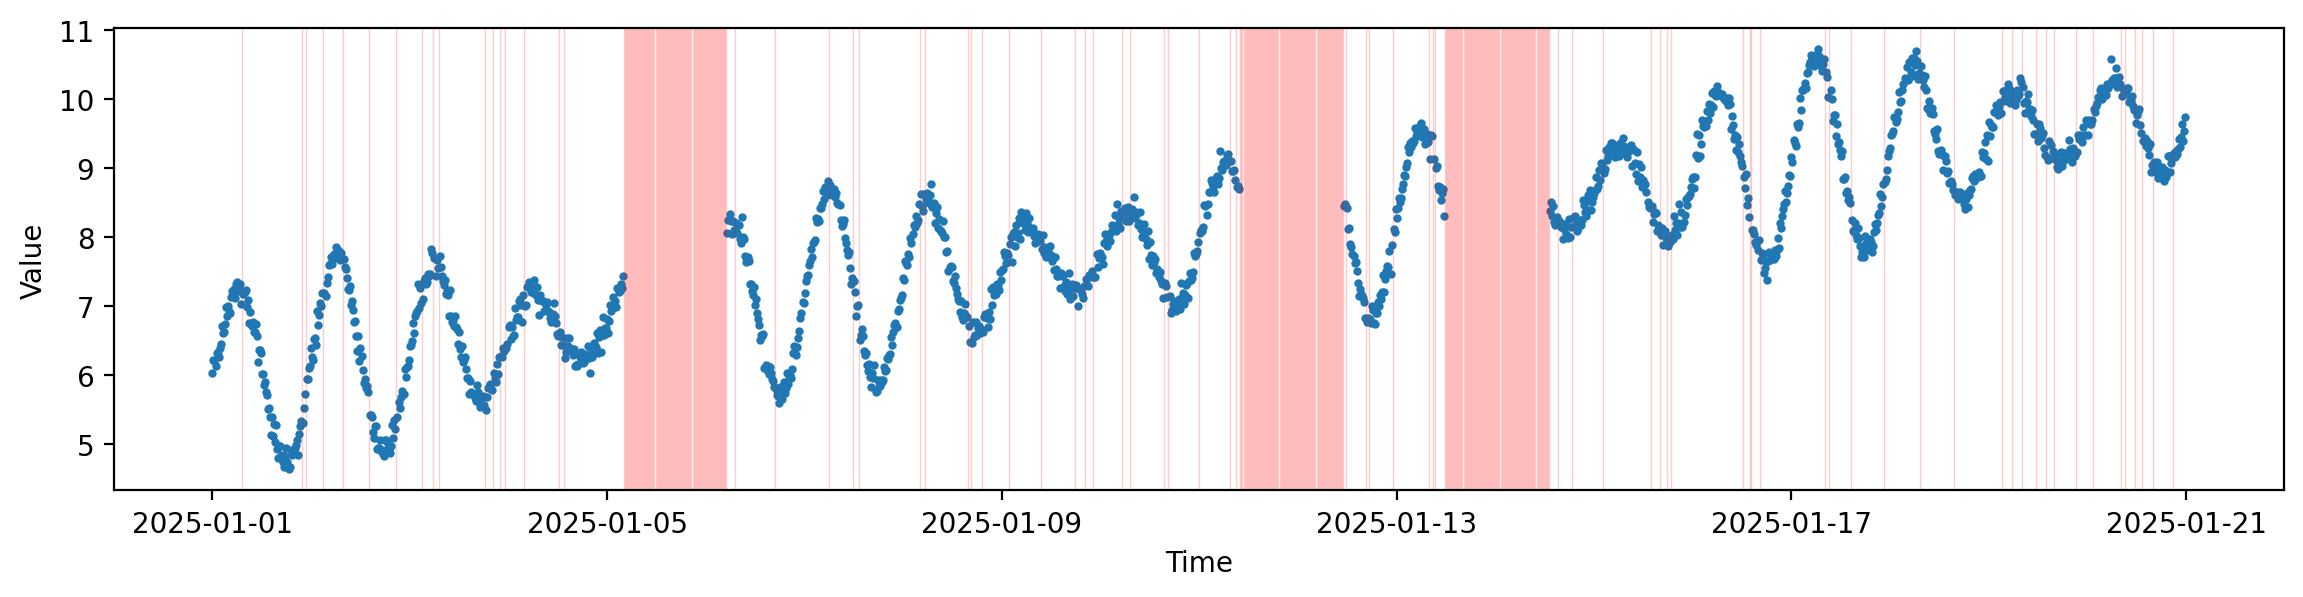

In [65]:
plt.figure(figsize=(14, 3))
plt.plot(df['ds'], df['y'], marker='o', linestyle='None', alpha=1, ms=2)
for ts in df[df['y'].isna()]['ds']:
    plt.axvline(x=ts, color='red', alpha=0.2, linewidth=0.5)
    
plt.xlabel("Time")
plt.ylabel("Value");

In [66]:
model = Prophet(daily_seasonality=True, changepoint_prior_scale=0.3, seasonality_mode='multiplicative')

In [67]:
model.fit(df[df['y'].notna()])

20:17:07 - cmdstanpy - INFO - Chain [1] start processing
20:17:08 - cmdstanpy - INFO - Chain [1] done processing


In [68]:
future = df[['ds']]
forecast = model.predict(future)

In [69]:
df['y_imputed'] = df['y']
df.loc[df['y'].isna(), 'y_imputed'] = forecast.loc[df['y'].isna(), 'yhat']

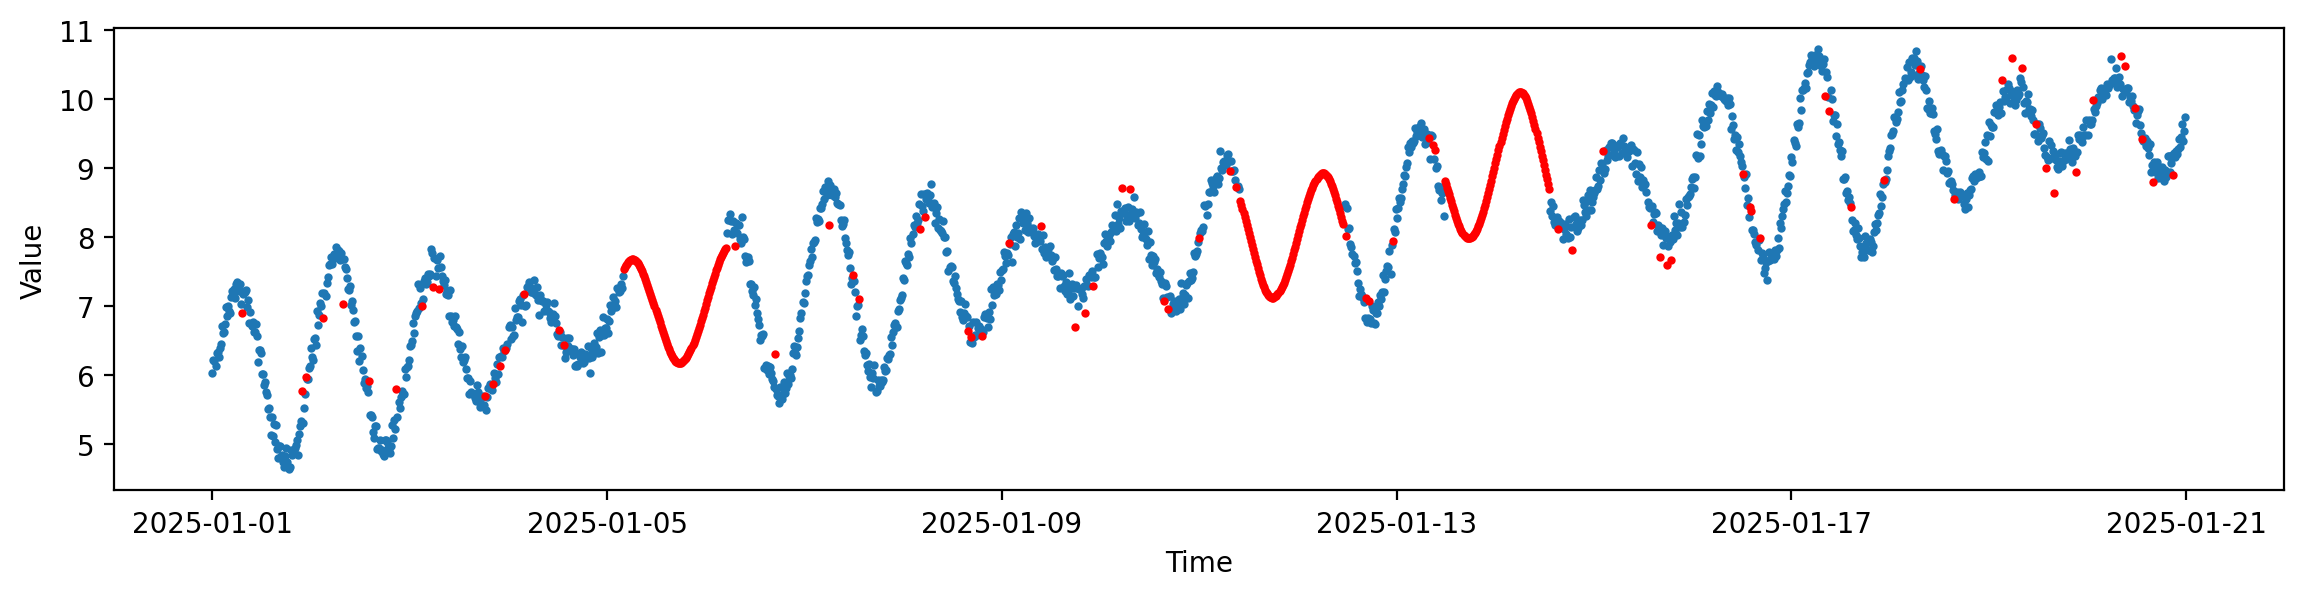

In [70]:
plt.figure(figsize=(14, 3))
plt.plot(df['ds'], df['y'], marker='o', linestyle='None', alpha=1, ms=2)
plt.plot(df[df['y'].isna()]['ds'], df[df['y'].isna()]['y_imputed'], color='red', ls="", marker="o", ms=2)    
plt.xlabel("Time")
plt.ylabel("Value");

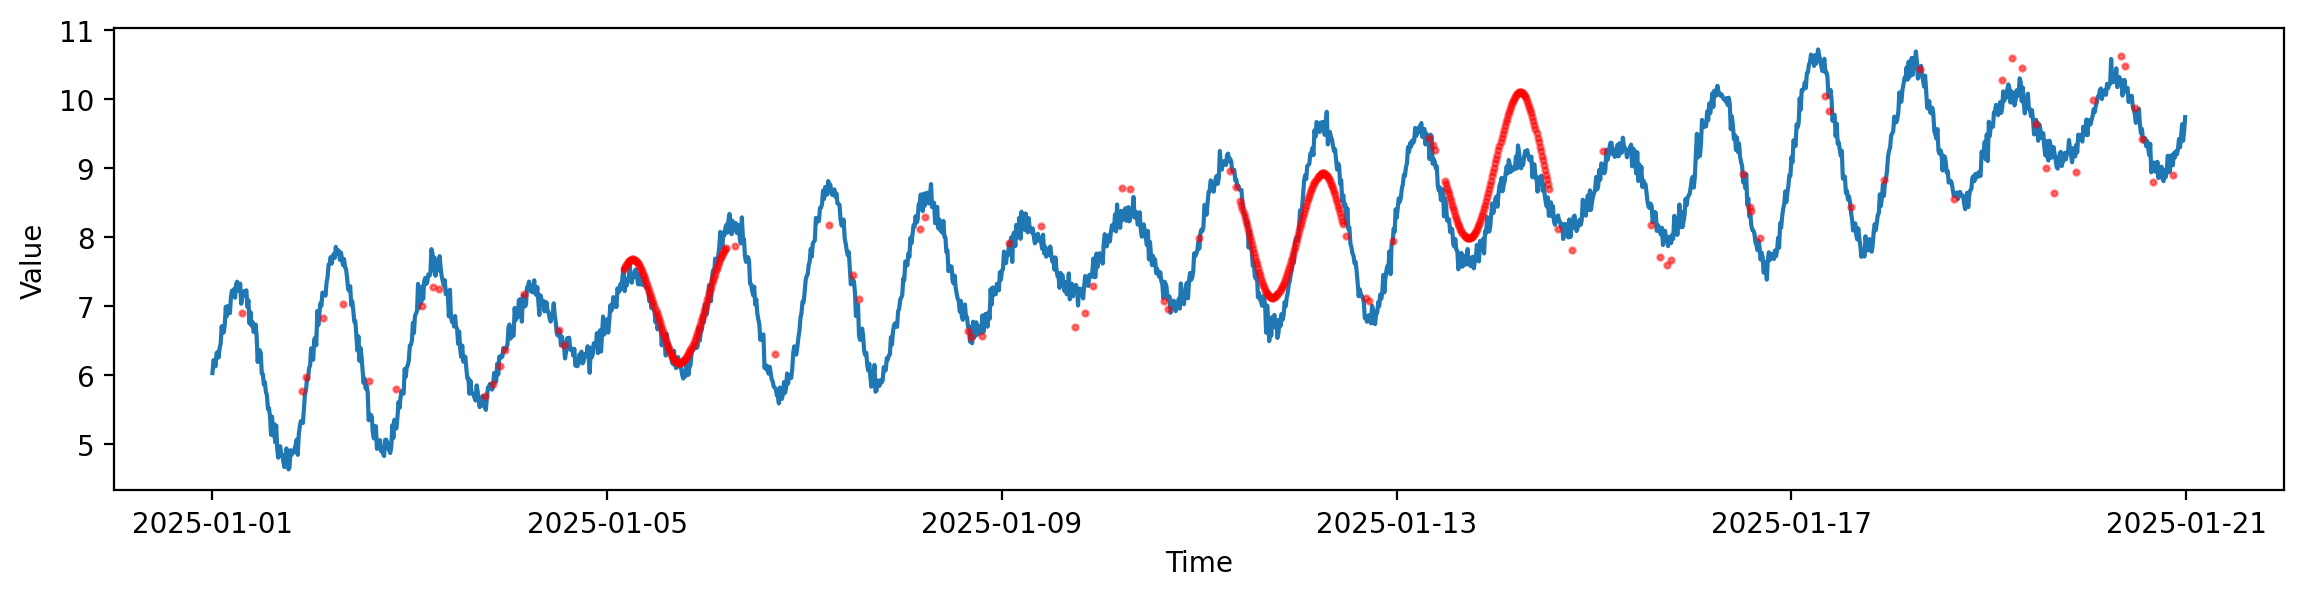

In [71]:
plt.figure(figsize=(14, 3))
plt.plot(df['ds'], df['y_full'], linestyle='-', alpha=1)

plt.plot(df[df['y'].isna()]['ds'], df[df['y'].isna()]['y_imputed'], color='red', ls="", marker="o", ms=2, alpha=0.5)    

plt.xlabel("Time")
plt.ylabel("Value");

<div class="alert alert-info">
 <strong>Assignment 5:</strong> How well does Trend and Seasonal Decomposition perform with this synthetic data set? 
</div>